<a href="https://colab.research.google.com/github/saranshikens/Epoch-Spring-Camp/blob/main/K_Nearest_Neighbours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPLEMENTING KNN FROM SCRATCH**  
By - Saransh

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**DISTANCE FUNCTION**  
It will define the notion of "closeness" among the data points.  
The metric to determine the nearest k-neighbours can be changed with distance_type.  
**NOTE-**distance_type must be greater than zero.

In [ ]:
def distance(point1, point2, distance_type):
  distance=0
  if(distance_type==1): # Manhattan Distance
    for i in range(len(point1)):
      distance += abs(point1[i]-point2[i])
    return distance
  elif(distance_type==2): # Euclidean Distance
    for i in range(len(point1)):
      distance += (point1[i]-point2[i])**2
    return distance**0.5
  elif(distance_type>0):
    for i in range(len(point1)): # Minkowski Distance of order 'distance_type'
      distance += (point1[i]-point2[i])**distance_type
    return distance**(1/distance_type)
  else:
    return "Invalid distance_type"

**KNN CLASSIFIER**

In [ ]:
class KNN:
  def __init__(self, k, distance_type):
    self.k=k
    self.distance_type = distance_type

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X_test):
    y_pred = [self.predict_one(x) for x in X_test]
    return y_pred

  def predict_one(self, x):
    distances = []
    for x_train in self.X_train:
      distances.append(distance(x, x_train, self.distance_type))
    k_indices = np.argsort(distances)[:self.k] # Stores the first k indices that would sort the distances in ascending order
    k_nearest_labels = [self.y_train[index] for index in k_indices] # Stores the labels of the k nearest neighbours
    most_common = np.bincount(k_nearest_labels).argmax() # np.bincount counts the frequency of each label and .argmax() returns the label with maximum frequency
    return most_common

**TRAINING DATA**

In [ ]:
data = [
    [150, 7.0, 1, 'Apple'],
    [120, 6.5, 0, 'Banana'],
    [180, 7.5, 2, 'Orange'],
    [155, 7.2, 1, 'Apple'],
    [110, 6.0, 0, 'Banana'],
    [190, 7.8, 2, 'Orange'],
    [145, 7.1, 1, 'Apple'],
    [115, 6.3, 0, 'Banana']
]

**ENCODING THE LABELS**

In [ ]:
encoded_data = [row[:] for row in data] # Create a copy of data. Encoding will be done with this list, so that 'data' remains preserved.
for row in encoded_data:
  if(row[3]=='Apple'): row[3]=0
  elif(row[3]=='Banana'): row[3]=1
  else: row[3]=2

**NORMALIZATION OF FEATURES**  
I will be using mini-max normalization, according to which  
$X = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}$



In [ ]:
# Only size and color have been normalized
max_Feature2 = max_Feature3 = -1 # Size and color are definitely not gonna be negative, hence this initialization
min_Feature2 = min_Feature3 = 100 # I guessed it

for i in range(len(encoded_data)):
  if(encoded_data[i][1]>max_Feature2): max_Feature2 = encoded_data[i][1]
  if(encoded_data[i][1]<min_Feature2): min_Feature2 = encoded_data[i][1]
  if(encoded_data[i][2]>max_Feature3): max_Feature3 = encoded_data[i][2]
  if(encoded_data[i][2]<min_Feature3): min_Feature3 = encoded_data[i][2]

for i in range(len(encoded_data)):
  encoded_data[i][1] = (encoded_data[i][1]-min_Feature2)/(max_Feature2-min_Feature2)
  encoded_data[i][2] = (encoded_data[i][2]-min_Feature3)/(max_Feature3-min_Feature3)

**CREATING THE FEATURE MATRIX AND LABEL VECTOR**

In [ ]:
features = [column[:3] for column in encoded_data] # Extract first three columns from 'encoded_data' and store them as a matrix i.e. a nested list
X = np.array(features)
labels = [column[3] for column in encoded_data] # Extract the fourth column from 'encoded_data'
y = np.array(labels)

**TESTING**

Test data

In [ ]:
test_data = np.array([
    [118, 6.2, 0, 'Banana'],  # Expected: Banana
    [160, 7.3, 1, 'Apple'],  # Expected: Apple
    [185, 7.7, 2, 'Orange']   # Expected: Orange
])

ACCURACY CHECKER

In [ ]:
def accuracy(test_data, predictions):
  correct = 0
  for i in range(len(test_data)):
    if(test_data[i][3]==predictions[i]): correct+=1
  return round((correct/len(test_data))*100, 2)

VISUALIZING DECISION BOUNDARIES

In [ ]:
def plot_decision_boundary(KNN, X, y, resolution=100): # I googled this thing up, too many matplotlib functions :(
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(KNN.predict(grid)).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    if(KNN.distance_type==1): distance = "Manhattan Distance"
    elif(KNN.distance_type==2): distance = "Euclidean Distance"
    else: distance = "Minkowski Distance of order " + str(KNN.distance_type)
    plt.title(f"{KNN.k}-NN Decision Boundary ({distance})")
    plt.xlabel('Weight (in gm)')
    plt.ylabel('Size (in cm) [Normalized]')
    plt.show()

Predictions for different K-values

k=1 with Euclidean Distance

['Banana', 'Apple', 'Orange']
Accuracy: 100.0 %


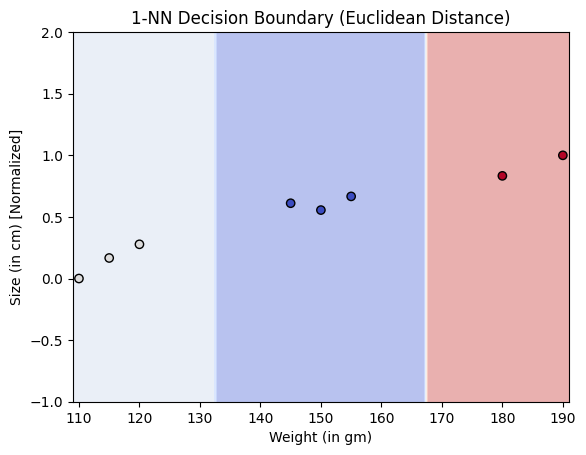

In [ ]:
A = KNN(1, 2)
A.fit(X, y)
test_data_features = [column[:3] for column in test_data]
test_data_features = np.array(test_data_features, dtype=np.float64)
predictions = A.predict(test_data_features)
for i in range(len(predictions)):
  if(predictions[i]==0): predictions[i]='Apple'
  elif (predictions[i]==1): predictions[i]='Banana'
  else: predictions[i]='Orange'
print(predictions)
print(f'Accuracy: {accuracy(test_data, predictions)} %')
plot_decision_boundary(A, X, y)

k=3 with Manhattan Distance

['Banana', 'Apple', 'Orange']
Accuracy: 100.0 %


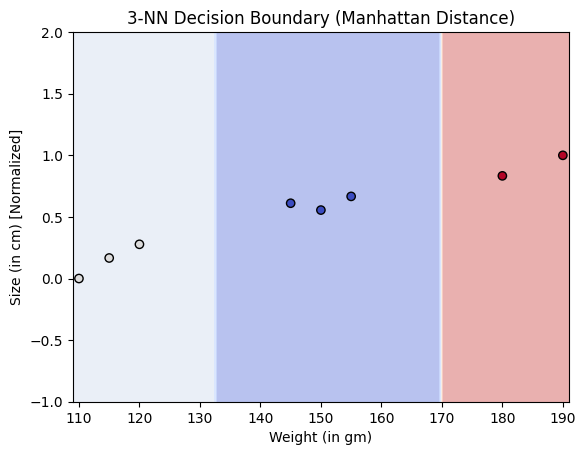

In [ ]:
A = KNN(3, 1)
A.fit(X, y)
test_data_features = [column[:3] for column in test_data]
test_data_features = np.array(test_data_features, dtype=np.float64)
predictions = A.predict(test_data_features)
for i in range(len(predictions)):
  if(predictions[i]==0): predictions[i]='Apple'
  elif (predictions[i]==1): predictions[i]='Banana'
  else: predictions[i]='Orange'
print(predictions)
print(f'Accuracy: {accuracy(test_data, predictions)} %')
plot_decision_boundary(A, X, y)

k=5 with Minkowski Distance of order 3

<ipython-input-3-da4fbba6dd07>:14: RuntimeWarning: invalid value encountered in scalar power
  return distance**(1/distance_type)


['Banana', 'Apple', 'Apple']
Accuracy: 66.67 %


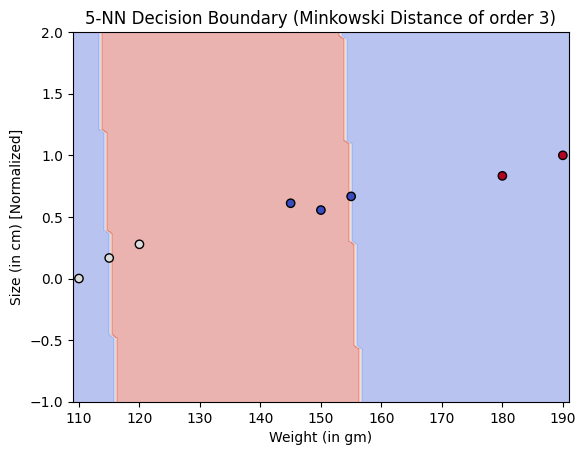

In [ ]:
A = KNN(5, 3)
A.fit(X, y)
test_data_features = [column[:3] for column in test_data]
test_data_features = np.array(test_data_features, dtype=np.float64)
predictions = A.predict(test_data_features)
for i in range(len(predictions)):
  if(predictions[i]==0): predictions[i]='Apple'
  elif (predictions[i]==1): predictions[i]='Banana'
  else: predictions[i]='Orange'
print(predictions)
print(f'Accuracy: {accuracy(test_data, predictions)} %')
plot_decision_boundary(A, X, y)